In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the data set 'iris' and store as a DataFrame object.

In [2]:
flowers = datasets.load_iris()
data = np.c_[flowers.data, flowers.target]
columns = np.append(flowers.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

# Let's compare sepal width vs. sepal length:

Text(0.5, 1.0, 'Sepal width vs. Sepal length')

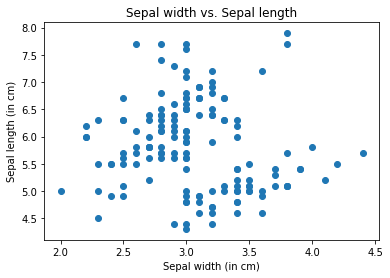

In [3]:
plt.scatter(df['sepal width (cm)'], df['sepal length (cm)'])
plt.xlabel('Sepal width (in cm)')
plt.ylabel('Sepal length (in cm)')
plt.title('Sepal width vs. Sepal length')

# It looks like there's no particular correlation between sepal width and sepal length. Instead, let's look at petal width vs. petal length:

Text(0.5, 1.0, 'Petal width vs. Petal length')

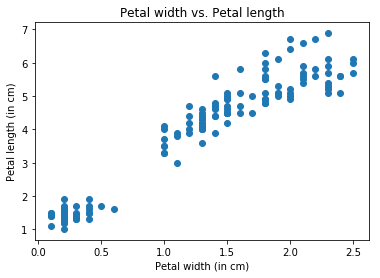

In [4]:
plt.scatter(df['petal width (cm)'], df['petal length (cm)'])
plt.xlabel('Petal width (in cm)')
plt.ylabel('Petal length (in cm)')
plt.title('Petal width vs. Petal length')

# Seems pretty linear! Let's do a linear regression on these two features. First, we'll pull out of the DataFrame the two columns we're interested in (stored as a panda series).

In [5]:
y = df['petal length (cm)']
X = pd.DataFrame(df['petal width (cm)'])

# Now, split the data into training data (70%) and test data (30%).

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
regr = linear_model.LinearRegression()

# Fit the model to the training data:

In [8]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Time to predict:

In [9]:
y_pred = regr.predict(X_test)

# How'd we do?

In [10]:
print("Mean squared error: " , mean_squared_error(y_test, y_pred))
print('Variance score: ', r2_score(y_test, y_pred))

Mean squared error:  0.1894377528550343
Variance score:  0.9438200288900181


# Great! Let's visualize what's going on:

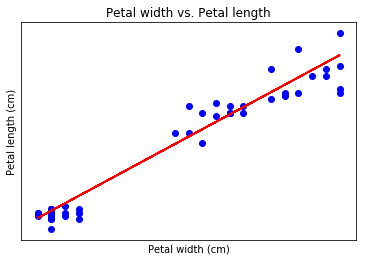

In [11]:
plt.scatter(X_test, y_test, c = 'b')
plt.plot(X_test, y_pred, c= 'r')
plt.xlabel('Petal width (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Petal width vs. Petal length')
plt.xticks(())
plt.yticks(())
plt.show()

# Here's an equation for our linear model: In other other words, the equation below says that if the petal width is X cm, then a good estimate of the petal width is y cm, where y is given below.

In [12]:
print('y = ' + str(regr.coef_[0]) + 'X + ' + str(regr.intercept_))

y = 2.219997543095434X + 1.119793520412229
